## 데이터 전처리 결과서

### 데이터 선정
1. Waze    
    - Waze는 이스라엘 Waze Mobile에서 만든 사용자 참여형 내비게이션 앱으로, GPS 기능이 있는 스마트폰 사용자들이 교통정보 및 도로정보를 실시간으로 공유하는 방식으로 운영된다.
    - 2022년 7월 기준, 전 세계적으로 1억 3천만명의 운전자가 사용하며, 6천만명이 지도를 편집하고, 3천만명이 자신이 사는 지역의 지도 정확성을 확인하는 관리자로 활동 중이다.
2. 선정 이유    
    - 사용자 참여로 운영되는 내비게이션 앱인만큼 사용자 이탈은 서비스 안정성과 성장에 있어 매우 중요한 요소
    - 사용자의 행동 패턴과 이탈 사이의 유의미한 상관관계를 도출함으로써 사용자 참여를 증대하고 이탈률을 낮추기 위한 개선 방안 수립 가능
    - 지도 앱의 사용자 경험을 최적화하고, 앱의 지속적인 성장을 지원할 수 있는 데이터 기반 인사이트 제공 가능
3. Dataset 설명
    - Waze 데이터셋은 Google Advanced Data Analytics Professional Certificate 프로그램의 일부로 제공되는 데이터셋
    - 앱 내에서 실제 사용자 행동을 시뮬레이션 하도록 설계
    - Waze와의 협력을 통해 제작된 합성 데이터로, 사용자 이탈을 분석하고 예측할 수 있는 다양한 요소를 포함

In [1]:
# Dataset
import pandas as pd
import numpy as np

data = pd.read_csv("data/waze_dataset.csv")

### 탐색적 데이터 분석(Exploratory Data Analysis, EDA)

1. 데이터 구조
    - 총 14999개의 행, 13개의 열

In [46]:
data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [48]:
data.shape

(14999, 13)

2. columns
    - ID: 사용자 고유 식별자.
    - label: 사용자의 이탈 상태(예: churned: 이탈, retained: 유지).
    - sessions: 사용자가 기록한 세션 수.
    - drives: 사용자가 완료한 주행 수.
    - total_sessions: 사용자에 대해 기록된 전체 세션 수.
    - n_days_after_onboarding: 사용자 가입 이후 경과한 일수.
    - total_navigations_fav1: 즐겨찾기 경로 1을 사용한 총 네비게이션 횟수.
    - total_navigations_fav2: 즐겨찾기 경로 2를 사용한 총 네비게이션 횟수.
    - driven_km_drives: 사용자가 운전한 총 거리(Km).
    - duration_minutes_drives: 주행 시간의 총 길이(분).
    - activity_days: 사용자 활동이 기록된 총 일수.
    - driving_days: 운전 활동이 기록된 총 일수.
    - device: 사용자 사용 기기(예: Android, iPhone).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


3. 결측치 탐색
    - target label인 "label" 에서만 결측치가 발견

In [42]:
data.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [47]:
data["label"].value_counts()

label
retained    11763
churned      2536
Name: count, dtype: int64

4. 기초 통계 분석

In [ ]:
data.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


5. 시각화

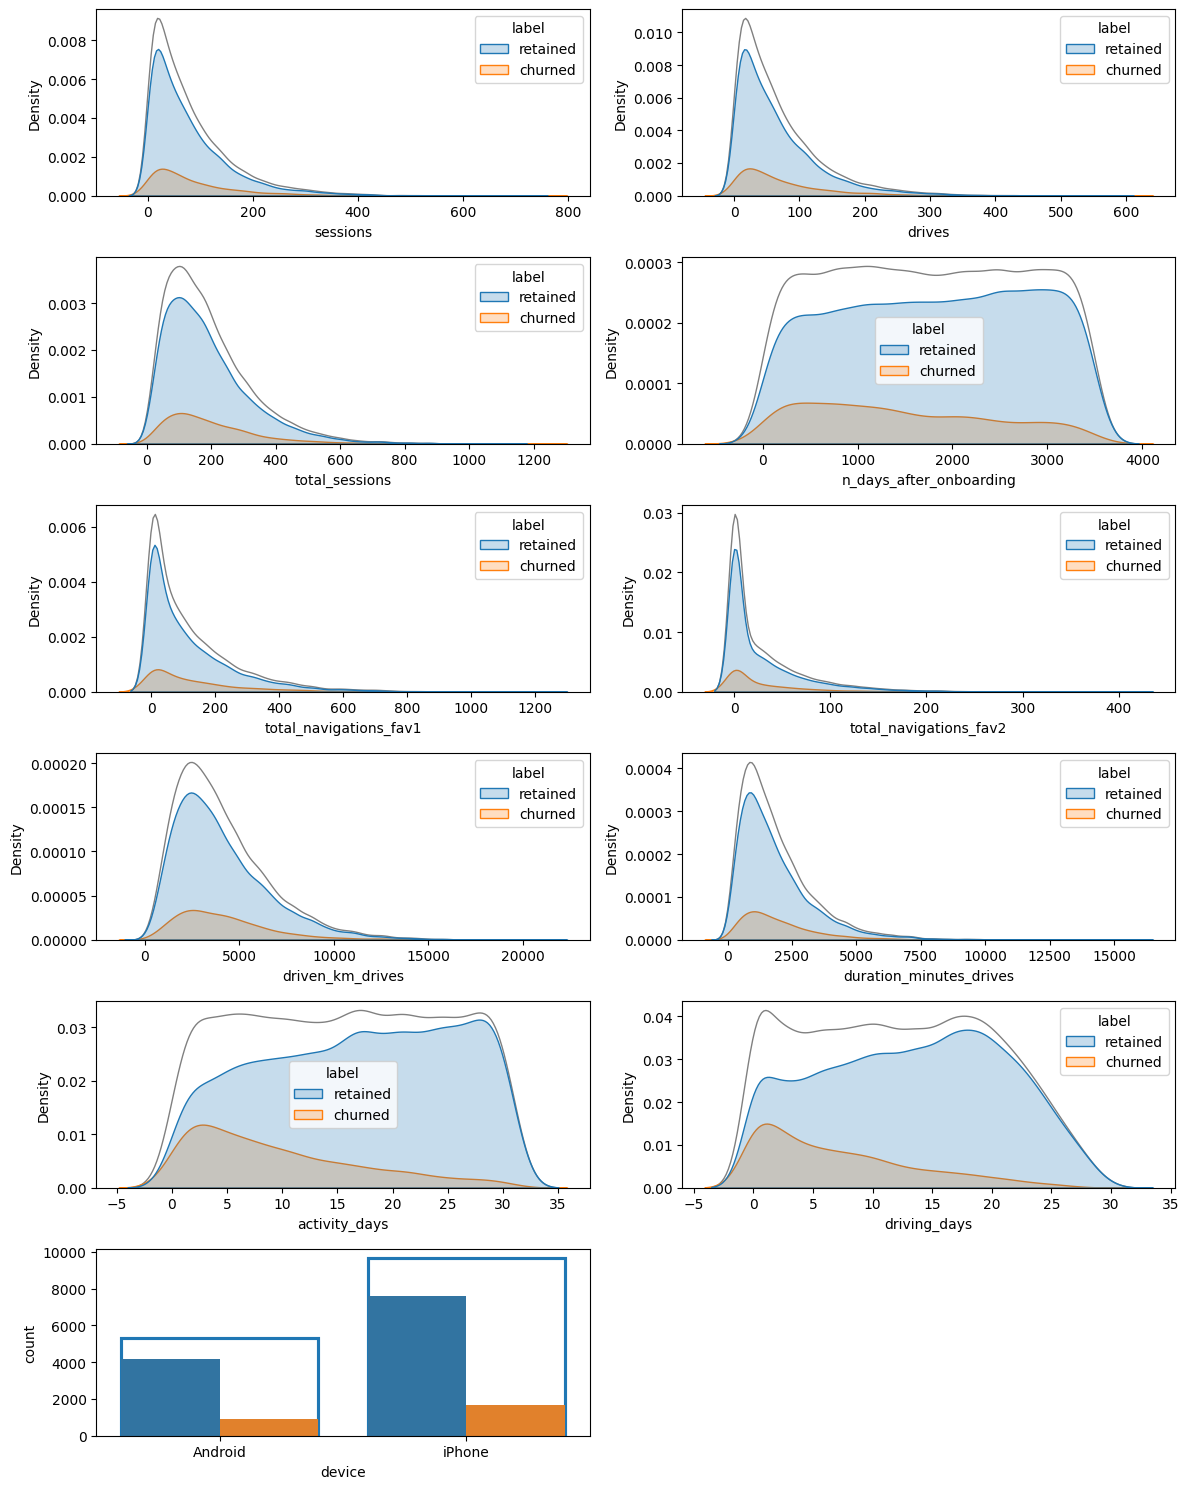

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 column별 target 분포
plt.figure(figsize=(12, 15))

columns = [
    "sessions",
    "drives",
    "total_sessions",
    "n_days_after_onboarding",
    "total_navigations_fav1",
    "total_navigations_fav2",
    "driven_km_drives",
    "duration_minutes_drives",
    "activity_days",
    "driving_days",
]

for i, col in enumerate(columns):
    plt.subplot(6, 2, i + 1)
    sns.kdeplot(x=data[col], data=data, fill=True, ec="gray", fc="white", legend=True)
    sns.kdeplot(x=data[col], data=data, hue=data["label"], fill=True, legend=True)


plt.subplot(6, 2, 11)
sns.countplot(x=data["device"], data=data, fill=False, legend=False)
sns.countplot(
    x=data["device"],
    data=data,
    hue=data["label"],
    fill=True,
    legend=False,
)
plt.tight_layout()
plt.show()

C:\Users\chung\AppData\Local\Temp\ipykernel_17824\1119876423.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


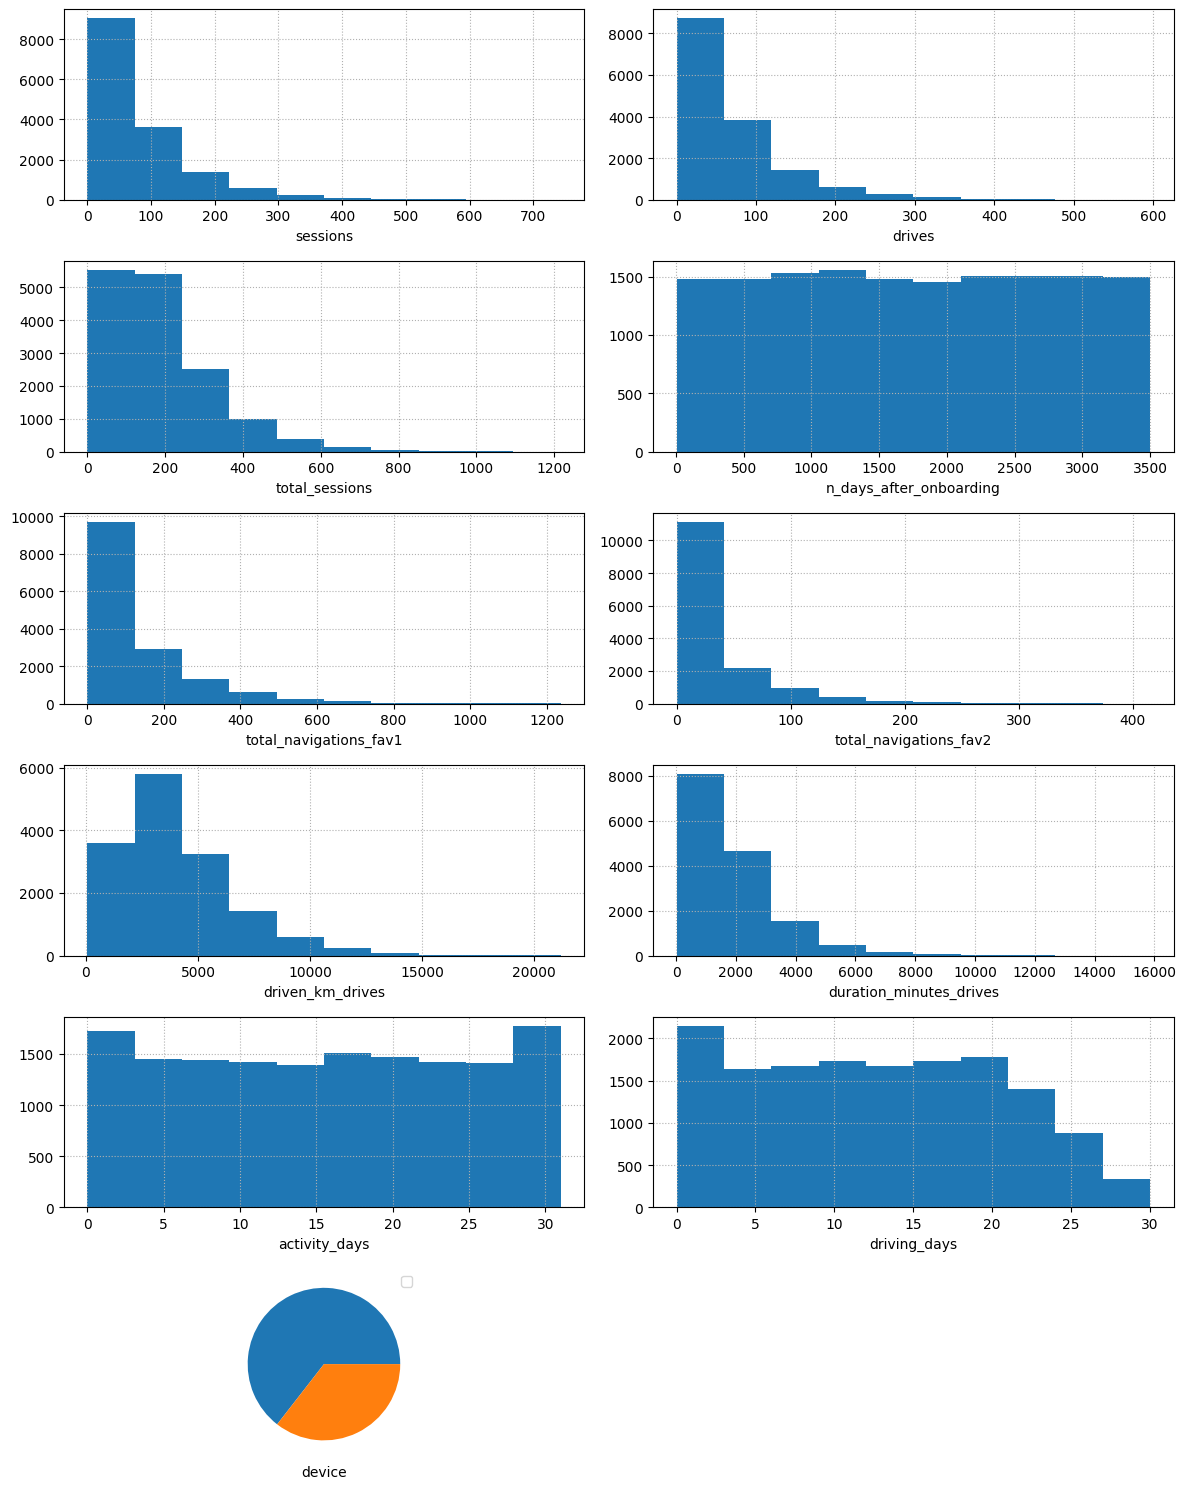

In [ ]:
# 각 column별 히스토그램, 파이차트
plt.figure(figsize=(12, 15))
columns = [
    "sessions",
    "drives",
    "total_sessions",
    "n_days_after_onboarding",
    "total_navigations_fav1",
    "total_navigations_fav2",
    "driven_km_drives",
    "duration_minutes_drives",
    "activity_days",
    "driving_days",
]
for i, col in enumerate(columns):
    plt.subplot(6, 2, i + 1)
    data[col].hist()
    plt.grid(linestyle=":")
    plt.xlabel(col)

plt.subplot(6, 2, 11)
plt.pie(x=data["device"].value_counts())
plt.xlabel("device")

plt.tight_layout()
plt.show()

### 전처리
1. 결측치
    - 결측치 처리 방법 및 이유
    - target 데이터인 label에서만 결측치가 있어 행 제거

In [3]:
data["label"].isnull().sum()  # 제거

np.int64(700)

In [4]:
data.dropna(inplace=True)

2. 데이터셋 분리

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop("label", axis=1)
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=0
)

3. 이상치
    - 이상치 판정 기준과 처리 방법 및 이유

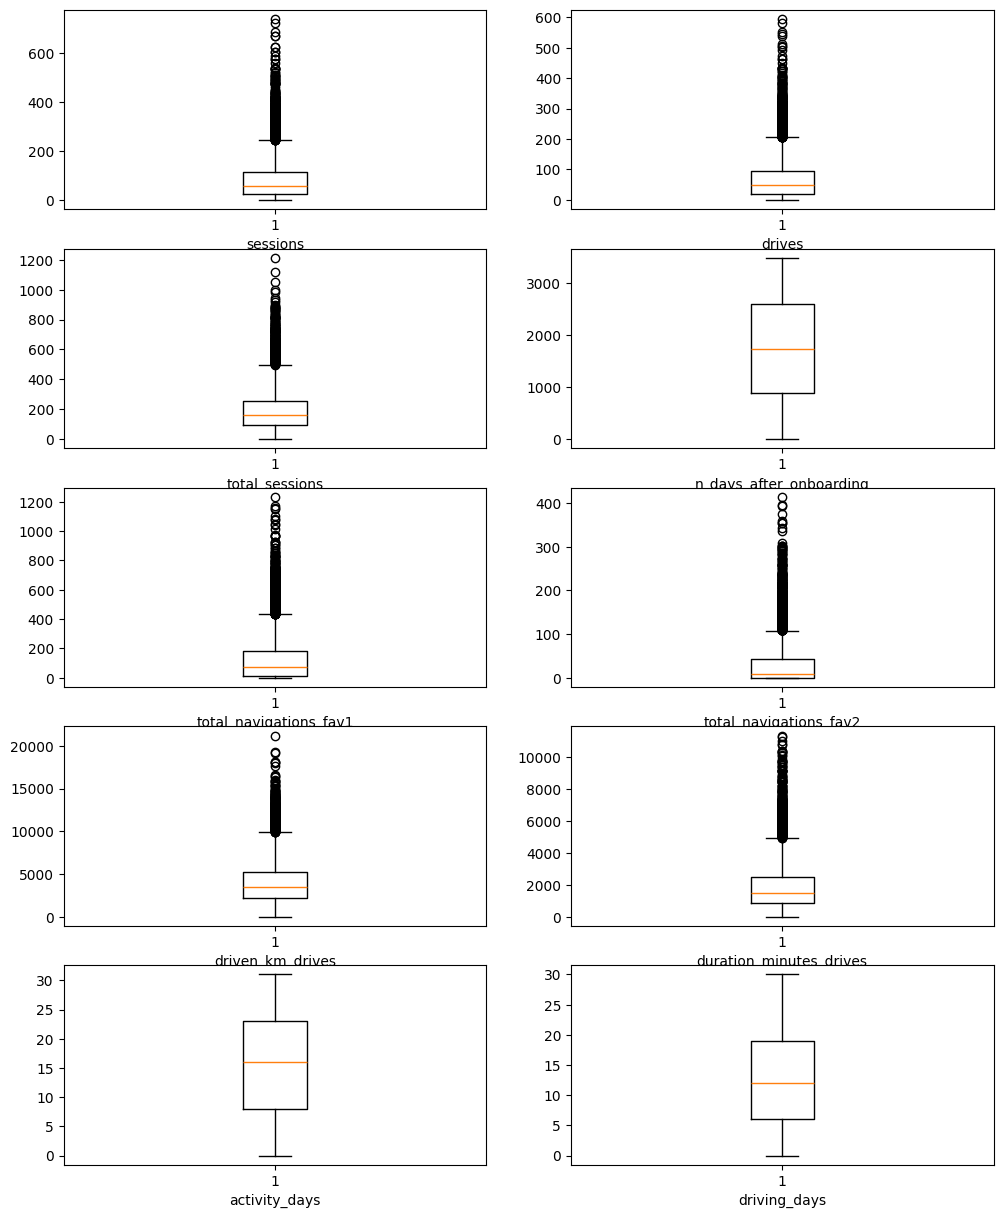

In [6]:
plt.figure(figsize=(12, 15))
columns = [
    "sessions",
    "drives",
    "total_sessions",
    "n_days_after_onboarding",
    "total_navigations_fav1",
    "total_navigations_fav2",
    "driven_km_drives",
    "duration_minutes_drives",
    "activity_days",
    "driving_days",
]
for i, col in enumerate(columns):
    plt.subplot(5, 2, i + 1)
    plt.boxplot(X_train[col])
    plt.xlabel(col)

In [7]:
columns = [
    "sessions",
    "drives",
    "total_sessions",
    "n_days_after_onboarding",
    "total_navigations_fav1",
    "total_navigations_fav2",
    "driven_km_drives",
    "duration_minutes_drives",
    "activity_days",
    "driving_days",
]

for i, col in enumerate(columns):
    q1, q3 = X_train[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    X_train[col] = np.where(
        X_train[col] > upper_bound,
        upper_bound,
        X_train[col],
    )
    X_train[col] = np.where(
        X_train[col] < lower_bound,
        lower_bound,
        X_train[col],
    )

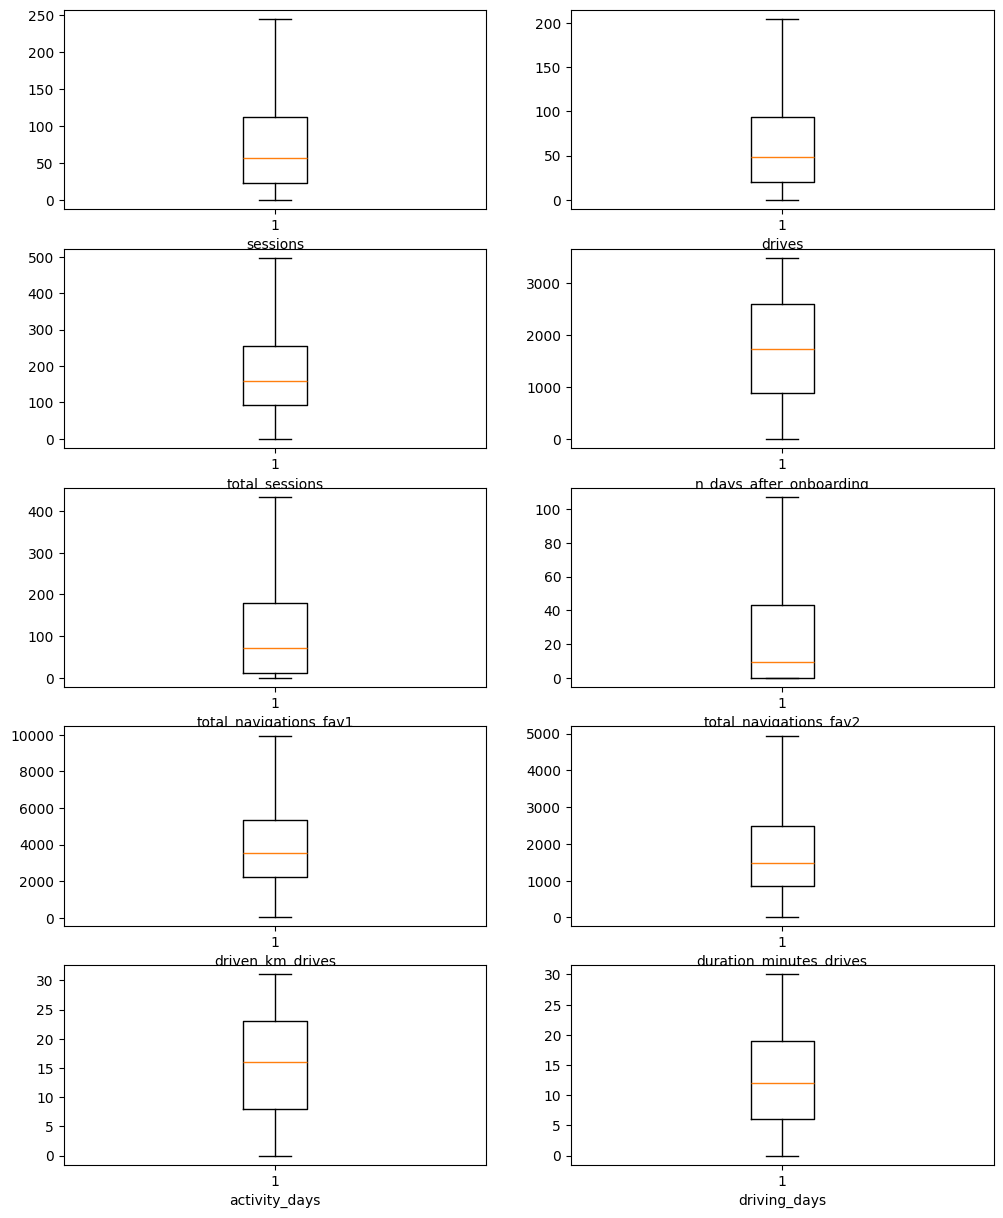

In [8]:
plt.figure(figsize=(12, 15))
columns = [
    "sessions",
    "drives",
    "total_sessions",
    "n_days_after_onboarding",
    "total_navigations_fav1",
    "total_navigations_fav2",
    "driven_km_drives",
    "duration_minutes_drives",
    "activity_days",
    "driving_days",
]
for i, col in enumerate(columns):
    plt.subplot(5, 2, i + 1)
    plt.boxplot(X_train[col])
    plt.xlabel(col)

3. Feature Engineering
    - Feature Engineering 방식 기술

In [12]:
# Lable Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
X_train["device"] = encoder.fit_transform(X_train["device"])
X_test["device"] = encoder.transform(X_test["device"])

In [16]:
y_train = pd.DataFrame(y_train, columns=["label"])
y_test = pd.DataFrame(y_test, columns=["label"])

In [18]:
# save propresed data
X_train.to_csv("data/X_train.csv", index=False)
X_test.to_csv("data/X_test.csv", index=False)
y_train.to_csv("data/y_train.csv", index=False)
y_test.to_csv("data/y_test.csv", index=False)